In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition
import matplotlib.pyplot as plt
import numpy as np

In [2]:
export_commodities_by_air = pd.read_json('./final_datasets/export_commodities_by_air.json')
export_commodities_by_sea = pd.read_json('./final_datasets/export_commodities_by_sea.json')
import_commodities_by_sea = pd.read_json('./final_datasets/import_commodities_by_sea.json')
import_commodities_by_air = pd.read_json('./final_datasets/import_commodities_by_air.json')

In [3]:
export_commodities_by_air.shape

(22, 8)

In [37]:
model = KMeans(8)
export_commodities_by_air_y = model.fit_predict(export_commodities_by_air)

model = KMeans(12)
export_commodities_by_sea_y = model.fit_predict(export_commodities_by_sea)

model = KMeans(12)
import_commodities_by_sea_y = model.fit_predict(import_commodities_by_sea)

model = AffinityPropagation()
import_commodities_by_air_y = model.fit_predict(import_commodities_by_air)

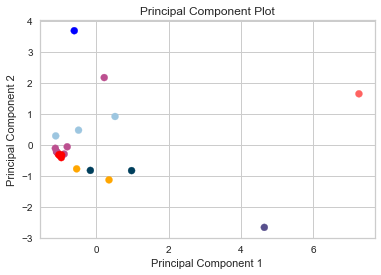

In [38]:
X = export_commodities_by_air
y = export_commodities_by_air_y

LABEL_COLOR_MAP = {
    0: 'red',
    1: 'blue',
    2: '#003f5c',
    3: '#58508d',
    4: '#bc5090',
    5: '#ff6361',
    6: '#ffa600',
    7: '#9dc6e0',
    8: '#c1e7ff',
    9: '#488f31',
    10: '#83af70',
    11: '#bad0af',
    12: '#f1f1f1',
}

label_color = [LABEL_COLOR_MAP[yi] for yi in y]

visualizer = PCADecomposition(scale=True, color=label_color)
visualizer.fit_transform(X, y)
visualizer.poof()

In [39]:
column = pd.DataFrame(export_commodities_by_air_y)
column.index = export_commodities_by_air.index
column.columns = ["Cluster Labels"]
export_commodities_by_air.join(column)

,"Essential oils and resinoids,perfumery","Fish and Crustaceans,Mollassesand other Aquatic invertebrates","Footwear,Guiters and Parts of such articles",Organic Chemicals,"Other made up textiles articles sets worn clothing,worn textiles articles",Pharmaceutical Products,"Raw Hides,Skins and leather","Vehicles other than Tramway,rolling stock and parts and accessories thereof",Cluster Labels
Austria,0,0,28,0,0,0,0,0,0
China,38,0,0,53,0,5,34,0,7
Finland,0,0,11,0,0,0,0,0,4
France,0,0,100,0,6,0,8,0,6
Germany,0,0,161,31,6,15,42,9,2
Hong Kong,0,20,0,0,0,0,364,0,1
Hungary,0,0,25,0,0,0,0,0,0
Indonesia,0,0,0,0,0,0,8,0,4
Italy,0,0,228,15,0,5,39,0,2
Japan,0,0,0,0,5,0,9,0,4
